In [1]:
import pandas as pd
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
# Making random data for the purpose of this example.
random.seed(0)
np.random.seed(0)
size = 1000
number_of_columns = 10
random_noise = 10
df = pd.DataFrame({k:(np.random.random(size) + random.randint(0, random_noise)) 
                   for k in range(number_of_columns)})

In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.495922,6.511350,0.505448,4.483695,8.488439,7.493393,6.491320,4.494825,7.495352,5.504845
std,0.290744,0.299108,0.286889,0.286251,0.282093,0.290282,0.285956,0.296249,0.284988,0.293246
min,6.000546,6.000367,0.000074,4.000072,8.001961,7.000491,6.000851,4.000150,7.000254,5.001297
25%,6.247613,6.255214,0.271467,4.240161,8.243910,7.241095,6.232470,4.223674,7.249384,5.246891
50%,6.481323,6.519487,0.500607,4.462550,8.493600,7.490321,6.492362,4.498799,7.493467,5.500271
75%,6.737260,6.778098,0.756782,4.733752,8.729538,7.749742,6.736860,4.747941,7.742559,5.770889
max,6.999809,6.998527,0.999964,4.999931,8.997354,7.999957,6.999478,4.999708,7.999978,5.999386


In [4]:
# The Anova:
alpha = 0.05
f_val, p_val = stats.f_oneway(*[df[k] for k in range(len(df.columns))])

print("The $p$ value is {}.".format(p_val))

if p_val < alpha:
    print("The difference between the distributions is statistically significant at the {} level.".format(alpha))
else:
    print("The difference between the distributions is NOT statistically significant at the {} level.".format(alpha))

The $p$ value is 0.0.
The difference between the distributions is statistically significant at the 0.05 level.


In [5]:
# Fit line to median of distributions
x = range(1, len(df.columns) + 1)
y = [np.median(df[col]) for col in df]
slope, intercept, r_val, p_val, slope_std_error = stats.linregress(x, y)

def line(x):
    """The regression line"""
    return slope * x + intercept

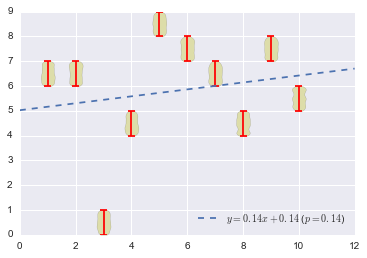

In [6]:
plt.figure()
plt.violinplot([df[col] for col in df]);
x1, x2 = plt.xlim()
plt.plot((x1, x2), (line(x1), line(x2)), '--',
         label="$y = {0:.2f}x + {0:.2f}$ ($p={0:.2f}$)".format(slope, intercept, p_val),
         ),
plt.legend(loc=4);

# Here is an example with different sized columns

In [7]:
# Making random data WITH DIFFERENT NUMBER OF OBSERVATIONS for the purpose of this example.
random.seed(0)
np.random.seed(0)
max_size = 10
number_of_columns = 10
random_noise = 10
dfs = [pd.DataFrame({k:(np.random.random(random.randint(1, max_size)) + random.randint(0, random_noise))}) for k in range(number_of_columns)]
df = pd.concat(dfs, ignore_index=True, axis=1)

In [8]:
df.tail()

,0,1,2,3,4,5,6,7,8,9
5,6.645894,NaN,7.925597,4.461479,5.414662,3.616934,2.128926,NaN,NaN,NaN
6,6.437587,NaN,7.071036,4.780529,5.264556,3.943748,2.315428,NaN,NaN,NaN
7,NaN,NaN,7.087129,NaN,5.774234,3.681820,2.363711,NaN,NaN,NaN
8,NaN,NaN,7.020218,NaN,NaN,3.359508,2.570197,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,3.437032,NaN,NaN,NaN,NaN


In [9]:
# Looking at number of items in each column
# Note here: `dropna`
[len(df[k].dropna()) for k in range(len(df.columns))]

[7, 1, 9, 7, 8, 10, 9, 5, 2, 5]

Note that one of the columns only has 1 row of data

In [10]:
# The Anova:
alpha = 0.05
f_val, p_val = stats.f_oneway(*[df[k].dropna() for k in range(len(df.columns))])  # dropna

print("The $p$ value is {}.".format(p_val))

if p_val < alpha:
    print("The difference between the distributions is statistically significant at the {} level.".format(alpha))
else:
    print("The difference between the distributions is NOT statistically significant at the {} level.".format(alpha))

The $p$ value is 1.2086949268478293e-46.
The difference between the distributions is statistically significant at the 0.05 level.


In [11]:
# Fit line to median of distributions
x = range(1, len(df.columns) + 1)
y = [np.median(df[col].dropna()) for col in df]  # dropna
slope, intercept, r_val, p_val, slope_std_error = stats.linregress(x, y)

def line(x):
    """The regression line"""
    return slope * x + intercept

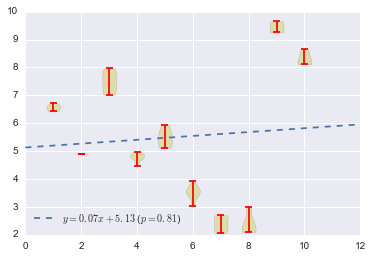

In [12]:
plt.figure()
plt.violinplot([df[col].dropna() for col in df]); # dropna
x1, x2 = plt.xlim()
plt.plot((x1, x2), (line(x1), line(x2)), '--',
         label="$y = {0:.2f}x + {1:.2f}$ ($p={2:.2f}$)".format(slope, intercept, p_val),
         ),
plt.legend(loc=3);